<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Globalwarming_Timeseries_ARIMA%20vs%20Moving%20average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install plotly --upgrade

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("GlobalTemperatures.csv")

In [7]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['dt'][0].split('-')[0]

'1750'

In [9]:
def fetch_year(date):
  return date.split('-')[0]

In [10]:
df['Year'] = df['dt'].apply(fetch_year)

In [11]:
df.head(n=20)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
 9   Year                                       3192 non-null   object 
dtypes: float64(8), object(2)

In [13]:
data = df.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               266 non-null    object 
 1   LandAverageTemperature             266 non-null    float64
 2   LandAverageTemperatureUncertainty  266 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.4+ KB


In [15]:
data.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [16]:
data.columns

Index(['Year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

In [17]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [18]:
fig = plt.figure(figsize=(10,8),dpi=120)
fig = px.line(data, x = 'Year', y = ['LandAverageTemperature','Uncertainty_top','Uncertainty_bottom'], title='Avg temperture over 3 centuries')
fig.show()

<Figure size 1200x960 with 0 Axes>

From the above line graph, it can be seen that the avg temperature has increased from around 8 to almost 10 degrees over 3 centuries

Examine the average temperatures in each season (spring, summer, autumn, winter); so need to analyze data based on month


In [19]:
df['dt'] = pd.to_datetime(df['dt'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   Year               

In [21]:
df['Month'] = df['dt'].dt.month

In [22]:
df.head(n=20)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750,6
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750,7
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750,8
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750,9
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN,1750,10


In [23]:
def get_season(month):
  if month >=3 and month <= 5:
    return('Spring')
  elif month >=6 and month <=8:
    return('Summer') 
  elif month >=9 and month <=11:
    return ('Autumn') 
  else:
    return('Winter')

In [24]:
df['Season'] = df['Month'].apply(get_season)

In [25]:
years = df['Year'].unique()

In [26]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

In [27]:
for year in years:
  current_df = df[df['Year'] == year]
  spring_temps.append(current_df[current_df['Season'] =='Spring']['LandAverageTemperature'].mean())
  summer_temps.append(current_df[current_df['Season'] =='Summer']['LandAverageTemperature'].mean())
  autumn_temps.append(current_df[current_df['Season'] =='Autumn']['LandAverageTemperature'].mean())
  winter_temps.append(current_df[current_df['Season'] =='Winter']['LandAverageTemperature'].mean())

In [28]:
season = pd.DataFrame()

In [29]:
season['year'] = years
season['spring'] = spring_temps
season['summer'] = summer_temps
season['autumn'] = autumn_temps
season['winter'] = winter_temps


In [30]:
season.head(n=15)

,year,spring,summer,autumn,winter
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
5,1755,8.583667,14.430667,9.233667,1.174333
6,1756,9.466000,13.963333,8.063000,3.906000
7,1757,8.604667,17.545000,8.455333,1.483000
8,1758,6.896667,12.934667,6.292333,0.850667
9,1759,6.897333,13.541667,8.387000,3.114333


In [31]:
season.columns

Index(['year', 'spring', 'summer', 'autumn', 'winter'], dtype='object')

In [32]:
fig = plt.figure(figsize=(12, 10), dpi= 150)
fig = px.line(season, x ='year', y = ['spring','summer','autumn','winter'], title = 'Avg land temperature by season over 3 centuries')
fig.show()

<Figure size 1800x1500 with 0 Axes>

As can be seen from the above line graph, there is an upward trend in the temperature in each season, especially from 1900s up to 2014. It is getting warmer since the previous century

In [33]:
from google.colab import drive


In [34]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [35]:
cities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GlobalLandTemperaturesByCity.csv')

In [36]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [37]:
cities.shape

(8599212, 7)

In [38]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [39]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [40]:
usa = cities[cities['Country'] == 'United States']

In [41]:
usa.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [42]:
usa.shape

(687289, 7)

In [43]:
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [44]:
dat = ['New York','Los Angeles','San Francisco']

In [45]:
data2 = usa[usa['City'].isin(dat)]

In [46]:
data3= data2.copy

In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7193 entries, 4356748 to 6637252
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             7193 non-null   object 
 1   AverageTemperature             7073 non-null   float64
 2   AverageTemperatureUncertainty  7073 non-null   float64
 3   City                           7193 non-null   object 
 4   Country                        7193 non-null   object 
 5   Latitude                       7193 non-null   object 
 6   Longitude                      7193 non-null   object 
dtypes: float64(2), object(5)
memory usage: 449.6+ KB


In [48]:
data2 = data2[['dt','AverageTemperature']]

In [49]:
data2.columns =['Date','Temp']

In [50]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834
4356753,1849-06-01,21.173
4356754,1849-07-01,26.159
4356755,1849-08-01,26.099
4356756,1849-09-01,21.848
4356757,1849-10-01,16.549


In [51]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [52]:
data2['Date'] =  pd.to_datetime(data2['Date'])

In [53]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

Check if there are missing values

In [54]:
data2.isna().sum()

Date      0
Temp    120
dtype: int64

As the sum in row Temp appears 120, so I can conclude that there are missing values, so I need  to remove the missing values

In [55]:
data2.dropna(inplace=True)

In [56]:
data2.shape

(7073, 2)

In [57]:
data2.set_index('Date', inplace=True)

In [58]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [59]:
data2.tail()

,Temp
Date,
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657
2013-08-01,19.731
2013-09-01,20.471


In [60]:
data2.index.is_unique

False

For time series data, we need to check if the data is stationary, in which the mean, variance and autocorrelation structure do not change over time;the statistical properties of a system do not change over time and overall behavior of the data should remain constant.

In [61]:
plt.figure(figsize= (12,10), dpi=150)
px.line( data2, x=data2.index , y=data2['Temp'])

<Figure size 1800x1500 with 0 Axes>

In [62]:
from statsmodels.tsa.stattools import adfuller


In [63]:
adfuller(data2['Temp'])

(-2.0063893036758143,
 0.28377865833331783,
 35,
 7037,
 {'1%': -3.431279613044704,
  '10%': -2.5669886726127307,
  '5%': -2.8619508146206374},
 28011.222669408726)

In [64]:
def adfuller_test(Temp):
  results = adfuller(Temp)
  labels = ['Adfuller Test stats', 'p-value','#flags used','no of observations used']
  for result,label in zip(results,labels):
    print('{}:{}'.format(result,label))
  if results[1] <= 0.05:
    print('Strong evidence to reject the null hypo, so we reject the null hypo, the data is stationary')
  else:
    print('Weak evidence to reject the null hypo, so we fail to reject the null hypo, the data is NOT stationary')


In [65]:
adfuller_test(data2['Temp'])

-2.0063893036758143:Adfuller Test stats
0.28377865833331783:p-value
35:#flags used
7037:no of observations used
Weak evidence to reject the null hypo, so we fail to reject the null hypo, the data is NOT stationary


We need to make the data stationary by shifting

In [66]:
df2 = data2.copy()

In [67]:
df2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [68]:
df2['First_dif_temperature'] = df2['Temp'] - df2['Temp'].shift(12)

In [69]:
df2.head(n=20)

,Temp,First_dif_temperature
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [70]:
df2 = df2.drop('Temp',axis=1)

In [71]:
df2.head(n=20)

,First_dif_temperature
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN
1849-06-01,NaN
1849-07-01,NaN
1849-08-01,NaN
1849-09-01,NaN


Test if the data after being shifted 12 months are stationary or not

In [72]:
adfuller_test(df2['First_dif_temperature'].dropna())

-21.239650404910893:Adfuller Test stats
0.0:p-value
35:#flags used
7025:no of observations used
Strong evidence to reject the null hypo, so we reject the null hypo, the data is stationary


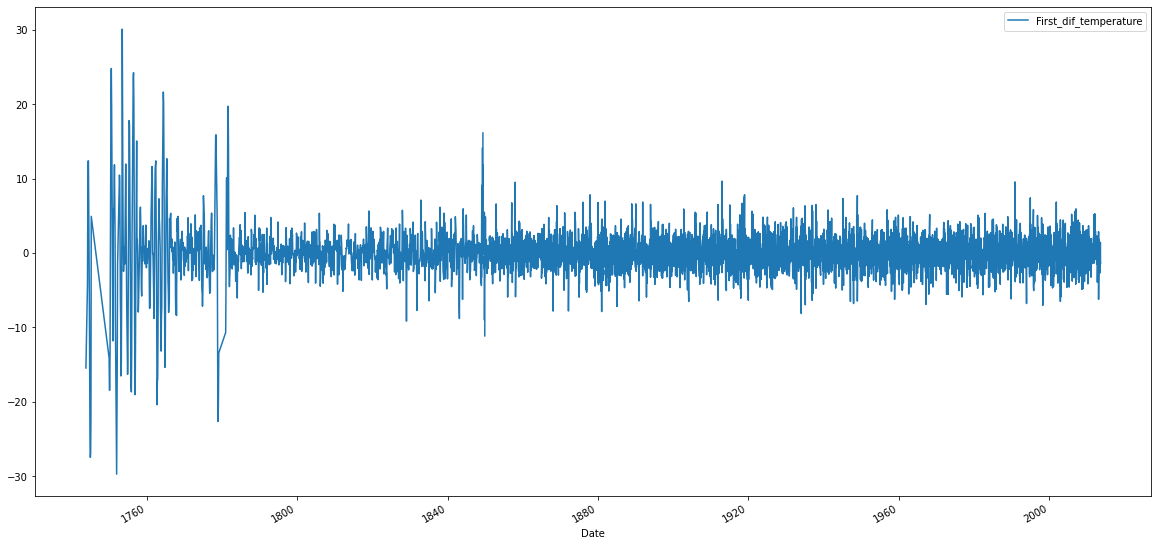

In [73]:
df2[['First_dif_temperature']].plot(figsize=(20,10))

Examine seasonality in data

In [74]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [75]:
data2['month'] = data2.index.month
data2['year'] = data2.index.year

In [76]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [77]:
pivot = data2.pivot_table(values='Temp', index='month',columns='year')
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1781,1782,1783,1784,1785,1786,1787,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,-4.790,-4.982,-3.350,-4.200,-6.900,NaN,-6.632,-3.228,-4.023,-4.324,-3.511,-3.644,-1.794,-4.794,-0.039,-3.740,-2.708,-6.386,-1.127,-4.406,-1.703,-2.395,-3.598,-0.665,-5.170,-5.014,-6.080,-5.126,-5.301,-3.090,...,5.127667,5.626000,4.656000,2.853000,5.315667,4.232000,6.137667,4.609333,2.471333,5.545667,5.025667,3.456333,6.919667,4.341333,4.239333,5.147667,6.616333,5.261000,5.225000,5.428667,4.193667,6.597333,5.424333,5.256000,7.141667,5.741000,5.895000,4.700000,6.146333,6.581000,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,-1.507,-3.689,-0.007,-1.327,-2.162,-2.559,-4.010,0.683,-0.558,0.621,-2.073,1.139,-2.480,-1.657,-4.020,-1.898,-5.051,-1.681,1.335,-1.976,-1.677,NaN,2.204,-0.648,-3.844,-0.450,-6.486,-3.453,-2.107,-2.790,...,5.662667,6.281667,7.368333,7.452667,5.175333,3.688333,6.836000,8.354667,6.975333,7.220000,7.720333,6.714000,7.027000,6.387333,7.453000,5.177000,6.446333,8.873667,8.014000,5.216667,4.808333,7.207333,7.335333,7.907333,7.082000,6.718000,7.085667,5.958667,8.562333,5.698667,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,2.260,1.532,2.711,1.358,3.621,0.760,0.710,2.562,3.977,2.801,2.647,0.857,2.086,0.316,2.995,-0.539,2.469,3.005,4.784,1.712,2.658,NaN,2.134,2.728,0.662,1.627,0.747,-1.343,4.104,3.155,...,9.027000,7.811000,9.111333,8.860000,9.616333,9.672667,8.304333,8.616333,7.892333,9.554000,9.205000,8.559000,10.600667,9.539333,10.487000,9.740667,9.968333,8.267667,9.111667,9.618333,9.729667,9.750667,9.155667,10.656667,9.817000,8.002667,10.464333,9.645667,9.430000,10.064000,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,7.666,7.768,7.991,8.617,8.279,9.184,8.061,NaN,9.915,8.662,8.550,6.302,8.157,8.689,8.771,9.009,9.441,12.664,8.367,8.185,7.094,NaN,NaN,7.723,10.131,8.539,6.116,7.245,8.086,8.756,...,12.383667,9.173333,11.731000,13.274333,11.294667,12.076000,12.665333,13.318333,11.412000,11.080333,11.978667,13.967333,12.623667,14.256000,12.559667,13.814667,13.552333,12.525000,13.680667,13.064667,13.179333,11.791333,13.601333,12.861333,11.865000,11.593667,13.185000,11.586000,13.032667,10.623000,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,15.332,13.844,14.739,14.091,18.068,15.511,13.984,NaN,15.262,15.176,13.560,13.484,13.858,14.300,16.185,13.882,16.254,NaN,17.038,NaN,13.042,13.965,NaN,14.866,15.515,15.389,14.210,13.007,14.358,13.978,...,15.614333,16.759333,16.382333,14.889000,16.615000,16.897333,15.415000,16.602333,16.372333,15.829333,17.296333,16.205333,16.896333,17.149667,16.171333,16.125667,15.613333,16.211000,17.499333,17.112667,15.531667,14.833333,16.592333,17.981000,15.105333,15.567000,17.351000,18.744667,15.693333,15.874000,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,22.461,19.097,19.267,18.554,25.728,20.677,19.517,17.642,NaN,20.605,NaN,17.737,20.674,19.440,20.092,19.348,20.253,19.994,18.539,19.891,18.438,18.564,NaN,19.033,21.032,21.182,19.949,20.938,20.754,19.443,...,19.653667,19.174333,20.658000,19.615667,19.776333,19.849667,18.431667,

Text(0, 0.5, 'Temperature')

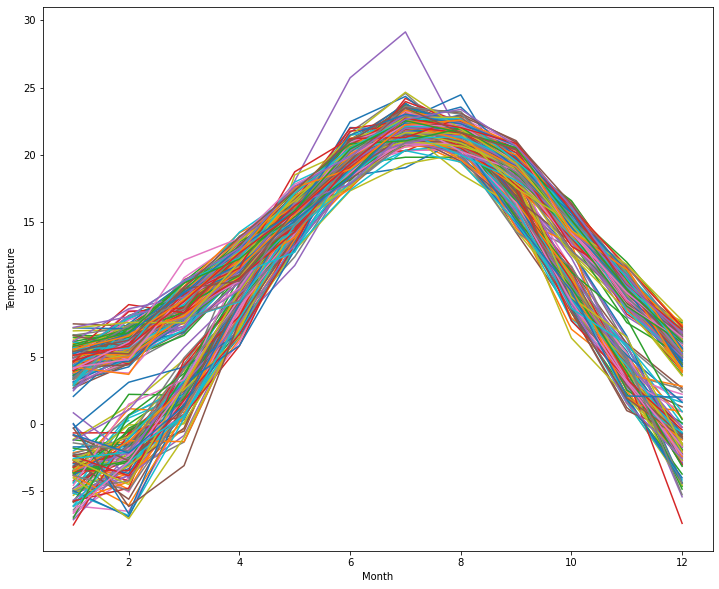

In [78]:
pivot.plot(figsize=(12,10))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Temperature')

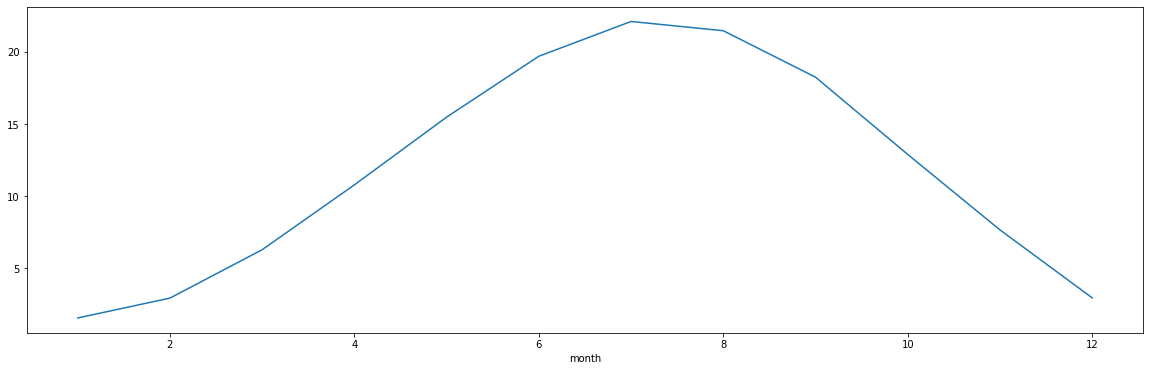

In [79]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))

We have seasonality in our data, when temperature is high during June and August, temperature started to decrease in autumn and winter months and it increased in spring

Buil Timeseries model using Moving Average

In [80]:
df2.head()

,First_dif_temperature
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN


In [81]:
df2.dropna(inplace=True)

In [82]:
df2['First_dif_temperature'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: First_dif_temperature, Length: 7061, dtype: float64

In [83]:
values = pd.DataFrame(df2['First_dif_temperature'])

In [84]:
temp_df = pd.concat([values,df2['First_dif_temperature'].rolling(window=5).mean()],axis=1)
temp_df.columns = ['Actual_temp','Forecast_temp']
temp_df

,Actual_temp,Forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
...,...,...
2013-05-01,0.879,0.4336
2013-06-01,1.277,1.0236
2013-07-01,1.025,1.4060


In [85]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(temp_df['Forecast_temp'][4:],temp_df['Actual_temp'][4:]))

2.3934235122562058

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [87]:
df2.head()

,First_dif_temperature
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


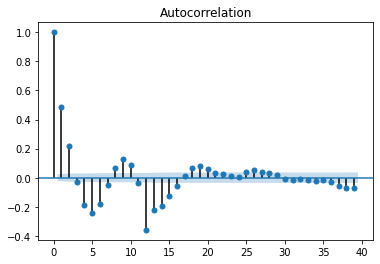

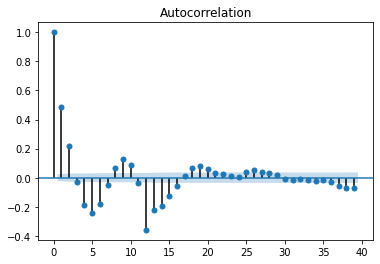

In [90]:
plot_acf(df2['First_dif_temperature'].dropna())

q is somewhere close to 3

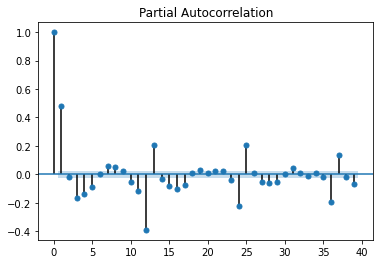

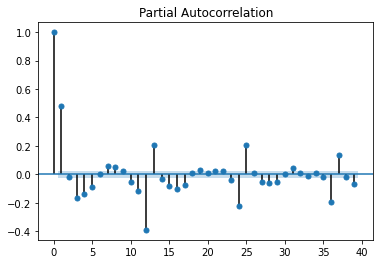

In [91]:
plot_pacf(df2['First_dif_temperature'].dropna())

p is somewhere close to 2

In [92]:
df2.isna().sum()

First_dif_temperature    0
dtype: int64

In [93]:
training_data = df2[0:6000]
test_data = df2[6000:]

In [94]:
from statsmodels.tsa.arima_model import ARIMA


In [95]:
arima = ARIMA(training_data, order =(2,1,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [96]:
model = arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [98]:
predictions = model.forecast(len(test_data))[0]

In [99]:
np.sqrt(mean_squared_error(test_data, predictions))

1.5120415308300965

The mean squared error attained from ARIMA model is 1.51 which is smaller than 2.39 (mean squared error attained from Moving average method). It can be understood that the temperature estimated by the model will fluctuate around 1.51 degrees from the actual temperature; which is better forecasted than Moving average method